# Arrays vs Images

Understanding the relationship between NumPy arrays and digital images.

## 1. Import Required Libraries

Libraries needed for image processing and visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Understanding Images as Arrays

Digital images are fundamentally 2D or 3D NumPy arrays where:
- **Grayscale images**: 2D array with shape (height, width)
- **Color images (RGB)**: 3D array with shape (height, width, 3)
- **Pixel values**: Typically 0-255 for 8-bit unsigned integers

In [2]:
# 2.1 Create a simple grayscale image
grayscale_img = np.array([
    [50, 100, 150, 200],
    [75, 125, 175, 225],
    [100, 150, 200, 250],
    [125, 175, 225, 200]
], dtype=np.uint8)

print("Grayscale Image:")
print(grayscale_img)
print(f"Shape: {grayscale_img.shape}")
print(f"Data type: {grayscale_img.dtype}")
print(f"Min value: {grayscale_img.min()}")
print(f"Max value: {grayscale_img.max()}")

# 2.2 Create a simple color image (RGB)
color_img = np.zeros((4, 4, 3), dtype=np.uint8)
# Red square in top-left
color_img[0:2, 0:2] = [255, 0, 0]
# Green square in top-right
color_img[0:2, 2:4] = [0, 255, 0]
# Blue square in bottom-left
color_img[2:4, 0:2] = [0, 0, 255]
# White square in bottom-right
color_img[2:4, 2:4] = [255, 255, 255]

print("\n\nColor Image Shape:", color_img.shape)
print("Pixel at [0, 0] (Red):", color_img[0, 0])
print("Pixel at [0, 3] (Green):", color_img[0, 3])
print("Pixel at [3, 0] (Blue):", color_img[3, 0])
print("Pixel at [3, 3] (White):", color_img[3, 3])

Grayscale Image:
[[ 50 100 150 200]
 [ 75 125 175 225]
 [100 150 200 250]
 [125 175 225 200]]
Shape: (4, 4)
Data type: uint8
Min value: 50
Max value: 250


Color Image Shape: (4, 4, 3)
Pixel at [0, 0] (Red): [255   0   0]
Pixel at [0, 3] (Green): [  0 255   0]
Pixel at [3, 0] (Blue): [  0   0 255]
Pixel at [3, 3] (White): [255 255 255]


## 3. Visualizing Images

Display arrays as images using matplotlib.

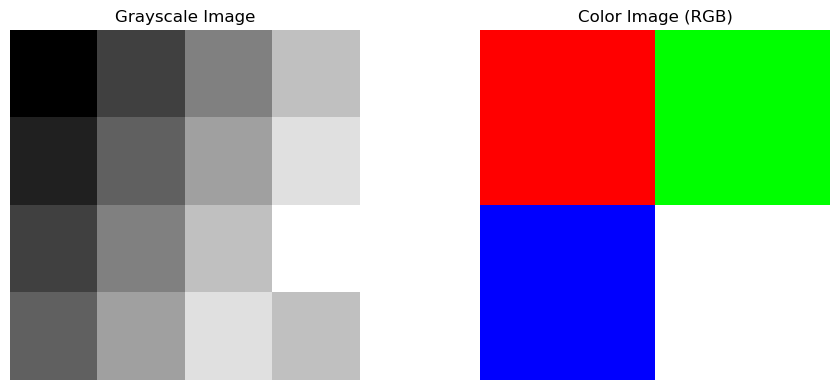

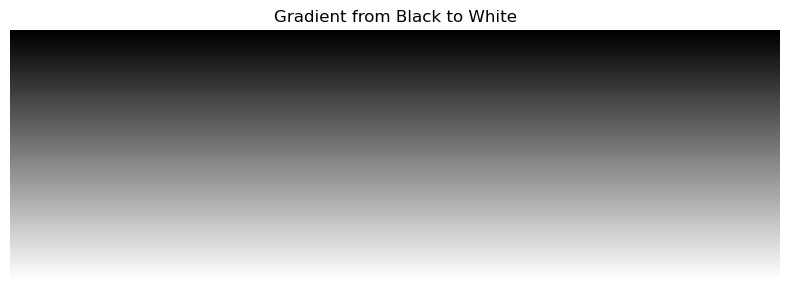

In [3]:
# 3.1 Display grayscale and color images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Display grayscale image
axes[0].imshow(grayscale_img, cmap='gray')
axes[0].set_title('Grayscale Image')
axes[0].axis('off')

# Display color image
axes[1].imshow(color_img)
axes[1].set_title('Color Image (RGB)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# 3.2 Create a gradient image
gradient = np.zeros((100, 100), dtype=np.uint8)
for i in range(100):
    gradient[i, :] = int(i * 2.55)

fig, ax = plt.subplots(figsize=(8, 3))
ax.imshow(gradient, cmap='gray', aspect='auto')
ax.set_title('Gradient from Black to White')
ax.axis('off')
plt.tight_layout()
plt.show()

## 4. Image Properties and Attributes

Accessing and understanding image dimensions and data types.

In [4]:
# 4.1 Create a sample color image (200x200)
sample_image = np.random.randint(0, 256, (200, 200, 3), dtype=np.uint8)

print("Image Properties:")
print(f"Shape: {sample_image.shape}")
print(f"Height: {sample_image.shape[0]} pixels")
print(f"Width: {sample_image.shape[1]} pixels")
print(f"Channels: {sample_image.shape[2]} (RGB)")
print(f"Data type: {sample_image.dtype}")
print(f"Size in bytes: {sample_image.nbytes}")
print(f"Total pixels: {sample_image.shape[0] * sample_image.shape[1]}")

# 4.2 Image statistics
print("\n\nImage Statistics:")
print(f"Minimum value: {sample_image.min()}")
print(f"Maximum value: {sample_image.max()}")
print(f"Mean value: {sample_image.mean():.2f}")
print(f"Standard deviation: {sample_image.std():.2f}")

# 4.3 Channel statistics
print("\n\nChannel Statistics:")
print(f"Red channel mean: {sample_image[:, :, 0].mean():.2f}")
print(f"Green channel mean: {sample_image[:, :, 1].mean():.2f}")
print(f"Blue channel mean: {sample_image[:, :, 2].mean():.2f}")

Image Properties:
Shape: (200, 200, 3)
Height: 200 pixels
Width: 200 pixels
Channels: 3 (RGB)
Data type: uint8
Size in bytes: 120000
Total pixels: 40000


Image Statistics:
Minimum value: 0
Maximum value: 255
Mean value: 127.82
Standard deviation: 73.80


Channel Statistics:
Red channel mean: 128.10
Green channel mean: 127.38
Blue channel mean: 127.99


## 5. Color Space Conversions

Converting between different color representations.

Grayscale conversion shapes:
NumPy method: (4, 4)
OpenCV method: (4, 4)
PIL method: (4, 4)

HSV image shape: (4, 4, 3)
Hue values range: 0-180 in OpenCV


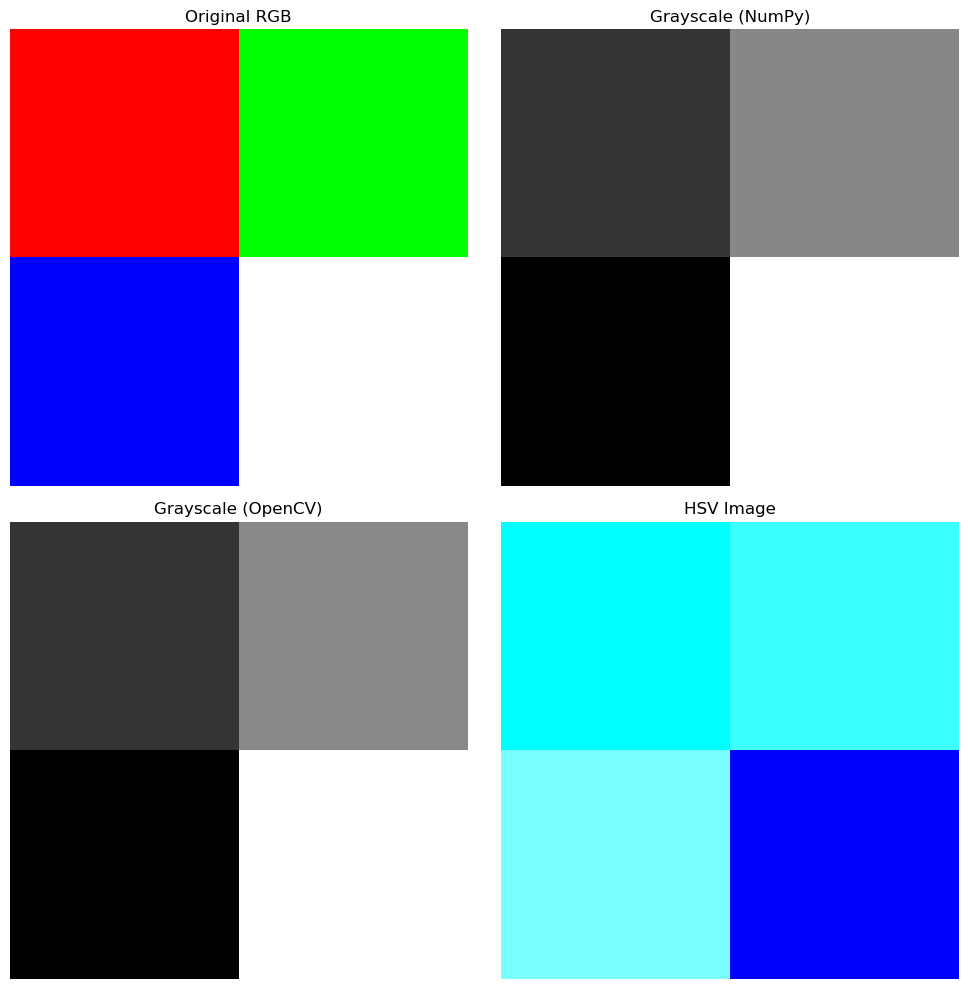

In [5]:
# 5.1 Create a test image
test_img = color_img.copy()

# 5.2 Convert RGB to Grayscale using different methods
# Method 1: Using numpy (weighted average)
gray_numpy = 0.299 * test_img[:, :, 0] + 0.587 * test_img[:, :, 1] + 0.114 * test_img[:, :, 2]
gray_numpy = gray_numpy.astype(np.uint8)

# Method 2: Using OpenCV
gray_cv2 = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)

# Method 3: Using PIL
pil_img = Image.fromarray(test_img)
gray_pil = np.array(pil_img.convert('L'))

print("Grayscale conversion shapes:")
print(f"NumPy method: {gray_numpy.shape}")
print(f"OpenCV method: {gray_cv2.shape}")
print(f"PIL method: {gray_pil.shape}")

# 5.3 Convert RGB to HSV
hsv_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2HSV)
print(f"\nHSV image shape: {hsv_img.shape}")
print(f"Hue values range: 0-180 in OpenCV")

# 5.4 Display conversions
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(test_img)
axes[0, 0].set_title('Original RGB')
axes[0, 0].axis('off')

axes[0, 1].imshow(gray_numpy, cmap='gray')
axes[0, 1].set_title('Grayscale (NumPy)')
axes[0, 1].axis('off')

axes[1, 0].imshow(gray_cv2, cmap='gray')
axes[1, 0].set_title('Grayscale (OpenCV)')
axes[1, 0].axis('off')

axes[1, 1].imshow(hsv_img)
axes[1, 1].set_title('HSV Image')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## 6. Image Manipulation Using Array Operations

Modifying images by manipulating the underlying arrays.

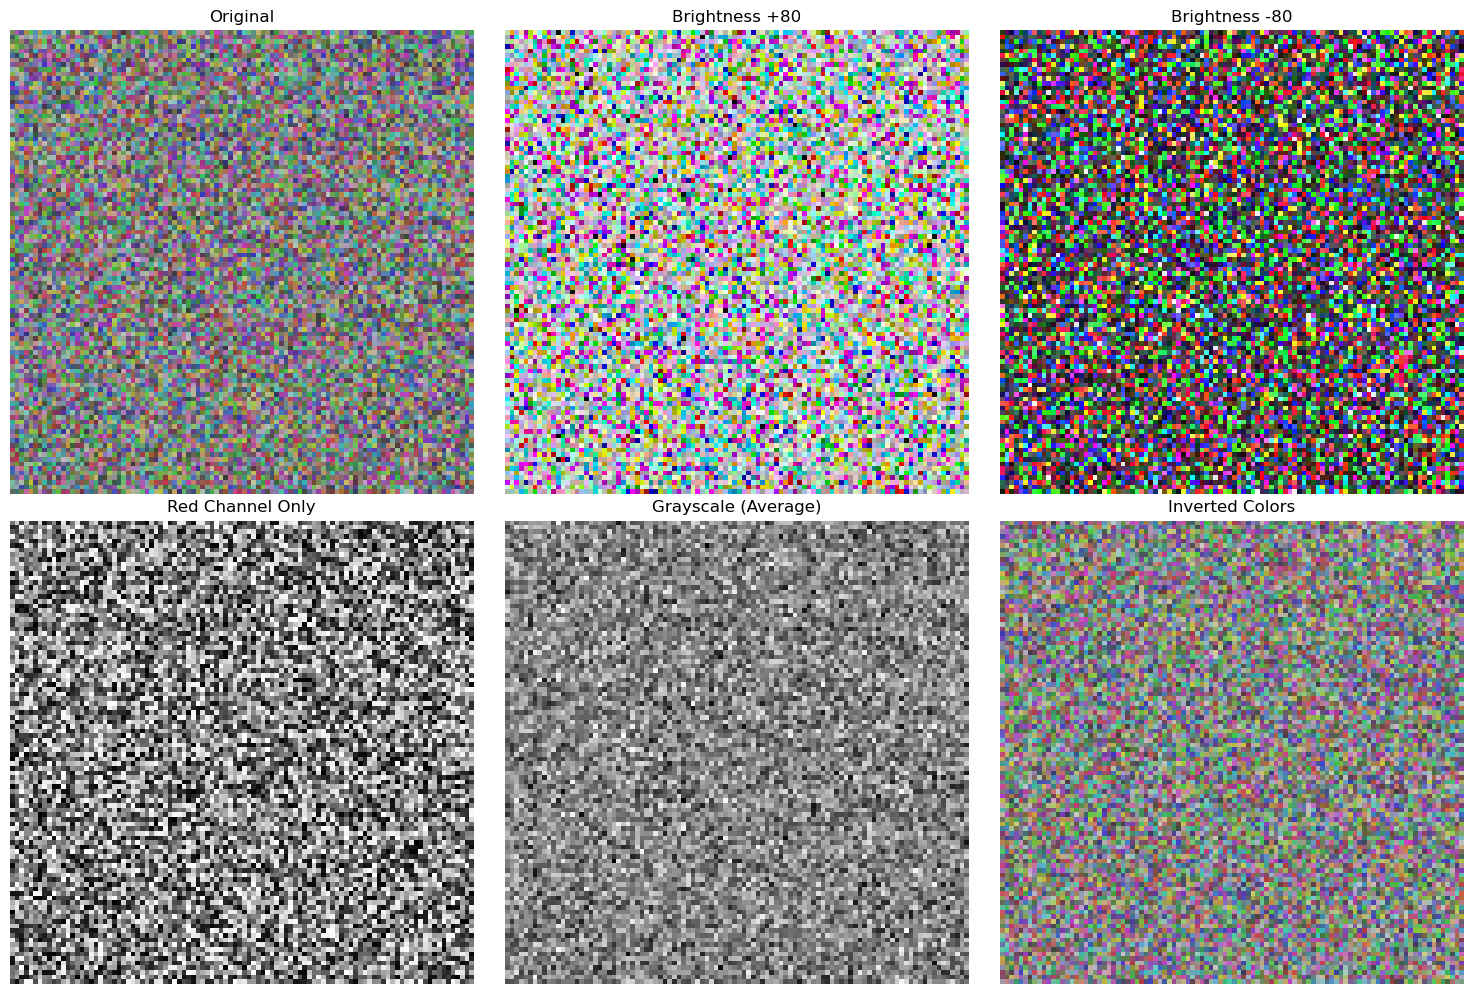

In [6]:
# 6.1 Create a base image
base_img = np.random.randint(50, 200, (100, 100, 3), dtype=np.uint8)

# 6.2 Increase brightness
bright_img = np.clip(base_img + 80, 0, 255).astype(np.uint8)

# 6.3 Decrease brightness
dark_img = np.clip(base_img - 80, 0, 255).astype(np.uint8)

# 6.4 Extract single channel
red_channel = base_img[:, :, 0]

# 6.5 Create grayscale from average of channels
gray_avg = (base_img[:, :, 0].astype(float) + 
            base_img[:, :, 1].astype(float) + 
            base_img[:, :, 2].astype(float)) / 3
gray_avg = gray_avg.astype(np.uint8)

# 6.6 Invert colors
inverted_img = 255 - base_img

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(base_img)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(bright_img)
axes[0, 1].set_title('Brightness +80')
axes[0, 1].axis('off')

axes[0, 2].imshow(dark_img)
axes[0, 2].set_title('Brightness -80')
axes[0, 2].axis('off')

axes[1, 0].imshow(red_channel, cmap='gray')
axes[1, 0].set_title('Red Channel Only')
axes[1, 0].axis('off')

axes[1, 1].imshow(gray_avg, cmap='gray')
axes[1, 1].set_title('Grayscale (Average)')
axes[1, 1].axis('off')

axes[1, 2].imshow(inverted_img)
axes[1, 2].set_title('Inverted Colors')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## 7. Image Resizing and Reshaping

Changing image dimensions using array operations.

Original size: (200, 200, 3)
Resized small: (100, 100, 3)
Resized large: (300, 300, 3)

Flipped horizontal shape: (200, 200, 3)
Rotated 45° shape: (200, 200, 3)


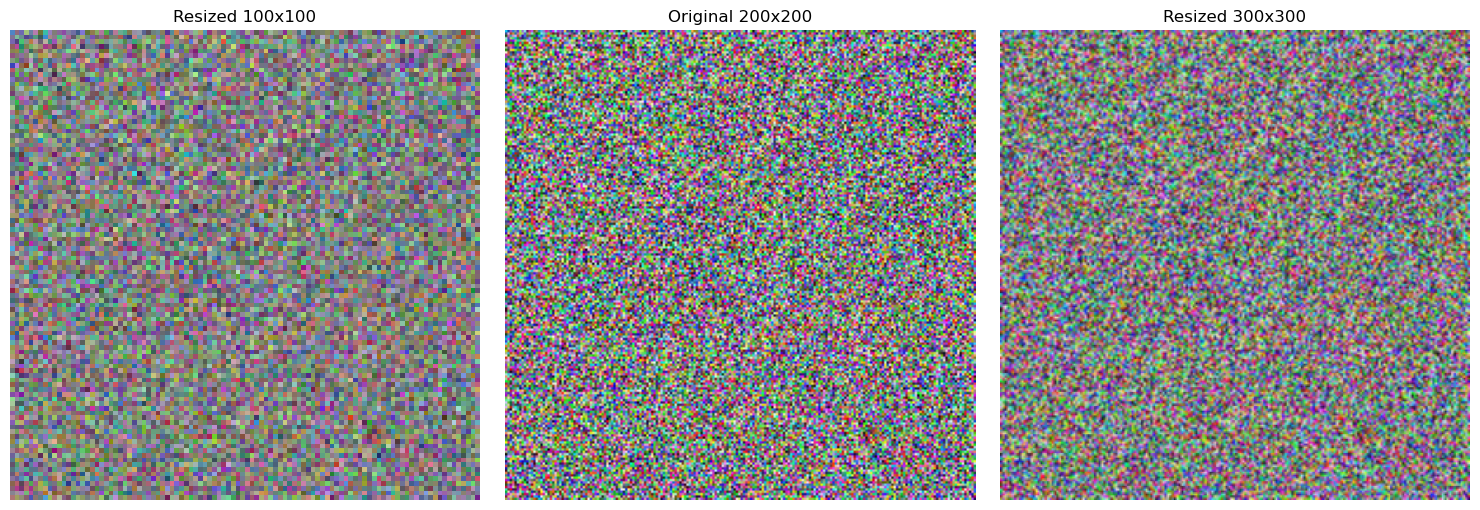

In [7]:
# 7.1 Resize using OpenCV
original = sample_image.copy()
print(f"Original size: {original.shape}")

# Resize to smaller dimensions
resized_small = cv2.resize(original, (100, 100))
print(f"Resized small: {resized_small.shape}")

# Resize to larger dimensions
resized_large = cv2.resize(original, (300, 300))
print(f"Resized large: {resized_large.shape}")

# 7.2 Flipping images
flipped_horizontal = cv2.flip(original, 1)
flipped_vertical = cv2.flip(original, 0)
flipped_both = cv2.flip(original, -1)

# 7.3 Rotating images
# Get rotation matrix (angle, center, scale)
rows, cols = original.shape[:2]
center = (cols // 2, rows // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(original, rotation_matrix, (cols, rows))

print(f"\nFlipped horizontal shape: {flipped_horizontal.shape}")
print(f"Rotated 45° shape: {rotated.shape}")

# Display resizing results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(resized_small)
axes[0].set_title('Resized 100x100')
axes[0].axis('off')

axes[1].imshow(original)
axes[1].set_title('Original 200x200')
axes[1].axis('off')

axes[2].imshow(resized_large)
axes[2].set_title('Resized 300x300')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## 8. Slicing and Cropping Images

Extracting regions from images using array slicing.

Original shape: (200, 200, 3)
Cropped shape (50:150, 50:150): (100, 100, 3)
Top-left quadrant: (100, 100, 3)
Bottom-right quadrant: (100, 100, 3)

Region (40,30) to (180,170): (140, 140, 3)


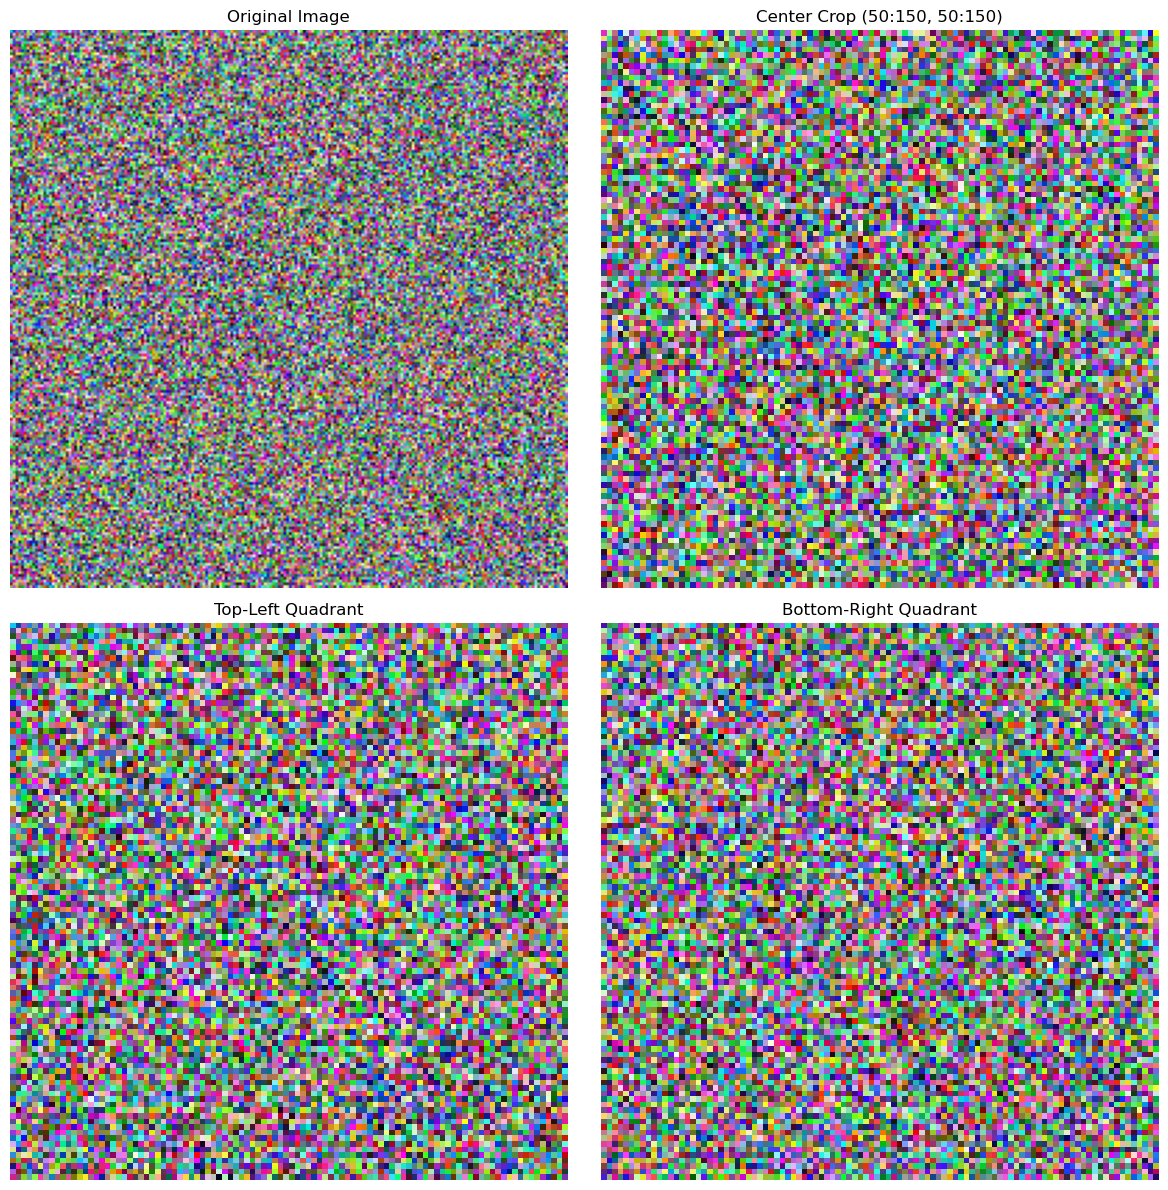

In [8]:
# 8.1 Crop image using slicing
img_to_crop = original.copy()
print(f"Original shape: {img_to_crop.shape}")

# Crop from (50,50) to (150,150)
cropped = img_to_crop[50:150, 50:150, :]
print(f"Cropped shape (50:150, 50:150): {cropped.shape}")

# Crop top-left quadrant
top_left = img_to_crop[0:100, 0:100, :]
print(f"Top-left quadrant: {top_left.shape}")

# Crop bottom-right quadrant
bottom_right = img_to_crop[100:200, 100:200, :]
print(f"Bottom-right quadrant: {bottom_right.shape}")

# 8.2 Extract regions based on coordinates
x1, y1, x2, y2 = 40, 30, 180, 170
region = img_to_crop[y1:y2, x1:x2, :]
print(f"\nRegion ({x1},{y1}) to ({x2},{y2}): {region.shape}")

# Display cropping
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].imshow(original)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(cropped)
axes[0, 1].set_title('Center Crop (50:150, 50:150)')
axes[0, 1].axis('off')

axes[1, 0].imshow(top_left)
axes[1, 0].set_title('Top-Left Quadrant')
axes[1, 0].axis('off')

axes[1, 1].imshow(bottom_right)
axes[1, 1].set_title('Bottom-Right Quadrant')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()